<a href="https://colab.research.google.com/github/alfarizky1009/ComparisonClassificationAlgorithm/blob/master/DaminTugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Playground and Setup**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !pip install matplotlib==3.1.0

In [3]:
ls

drive/  sample_data/


In [4]:
cd drive/My Drive/Colab Notebooks/Damin

/content/drive/My Drive/Colab Notebooks/Damin


**Import**

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from collections import Counter

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [0]:
data = pd.read_csv("dataDT.csv")

x = data[["age", "ed", "employ", "address", "income", "debtinc", "creddebt", "othdebt"]]
y = data["default"]

In [7]:
print(data['default'].value_counts().to_dict())

{0: 952, 1: 548}


In [8]:
data.head()

,branch,ncust,customer,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,3,3017,10012,28,2,7,2,44,17.7,2.99,4.80,0
1,3,3017,10017,64,5,34,17,116,14.7,5.05,12.00,0
2,3,3017,10030,40,1,20,12,61,4.8,1.04,1.89,0
3,3,3017,10039,30,1,11,3,27,34.5,1.75,7.56,0
4,3,3017,10069,25,1,2,2,30,22.4,0.76,5.96,1


In [9]:
x.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,28,2,7,2,44,17.7,2.99,4.80
1,64,5,34,17,116,14.7,5.05,12.00
2,40,1,20,12,61,4.8,1.04,1.89
3,30,1,11,3,27,34.5,1.75,7.56
4,25,1,2,2,30,22.4,0.76,5.96


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: default, dtype: int64

In [0]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
yTrain

620     0
655     1
319     1
140     0
629     1
       ..
763     1
835     0
1216    0
559     1
684     1
Name: default, Length: 1200, dtype: int64

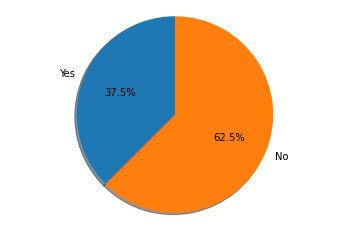

In [13]:
import matplotlib.pyplot as plt

yTrain_count = yTrain.value_counts()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Yes', 'No'
sizes = [yTrain_count[1], yTrain_count[0]]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

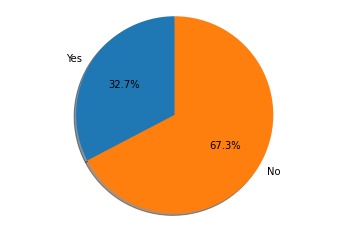

In [14]:
import matplotlib.pyplot as plt

yTest_count = yTest.value_counts()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Yes', 'No'
sizes = [yTest_count[1], yTest_count[0]]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [15]:
print("yTrain count = ", Counter(yTrain))
print("yTest count = ", Counter(yTest))

yTrain count =  Counter({0: 750, 1: 450})
yTest count =  Counter({0: 202, 1: 98})


In [16]:
print("Data Train = ", xTrain.count())
print("Data Test = ", xTest.count())

Data Train =  age         1200
ed          1200
employ      1200
address     1200
income      1200
debtinc     1200
creddebt    1200
othdebt     1200
dtype: int64
Data Test =  age         300
ed          300
employ      300
address     300
income      300
debtinc     300
creddebt    300
othdebt     300
dtype: int64


**Gaussian Naive Bayes**

In [0]:
bayesModel = GaussianNB()
bayesModel.fit(xTrain, yTrain);

In [0]:
bayesPred = bayesModel.predict(xTest)

In [19]:
bayesPred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [20]:
bayesPred_no = (bayesPred == 0).sum()
bayesPred_yes = (bayesPred == 1).sum()

print(bayesPred_no)
print(bayesPred_yes)

191
109


In [21]:
yTest_count

0    202
1     98
Name: default, dtype: int64

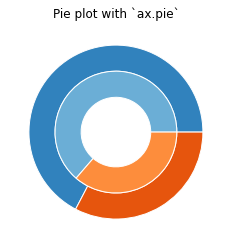

In [22]:
fig, ax = plt.subplots()

size = 0.3
# vals = np.array([[yTest_count[1], yTest_count[0]], [bayesPred_yes, bayesPred_no]])

yTest_pie = yTest_count.tolist()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 5]))

ax.pie(yTest_pie, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie([bayesPred_no, bayesPred_yes], radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
bayesCM = confusion_matrix(yTest, bayesPred)

In [24]:
bayesCM

array([[157,  45],
       [ 34,  64]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


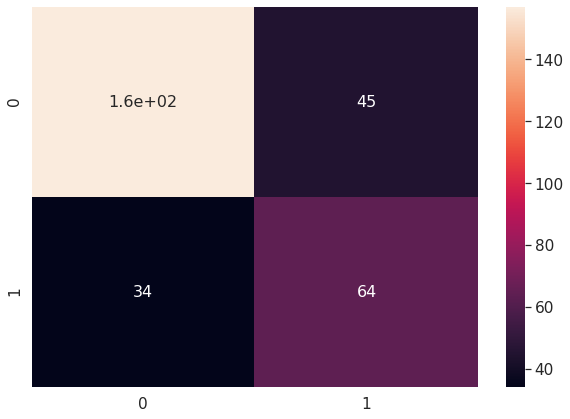

In [25]:
import seaborn as sn

df_cm = pd.DataFrame(bayesCM, range(2), range(2))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [26]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yTest, bayesPred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yTest, bayesPred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yTest, bayesPred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yTest, bayesPred)
print('F1 score: %f' % f1)

Accuracy: 0.736667
Precision: 0.587156
Recall: 0.653061
F1 score: 0.618357


**Random Forest**

In [27]:
rfModel = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
rfModel.fit(xTrain, yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
rfPred = rfModel.predict(xTest)

In [29]:
rfPred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [30]:
rfPred_no = (rfPred == 0).sum()
rfPred_yes = (rfPred == 1).sum()

print(rfPred_no)
print(rfPred_yes)

227
73


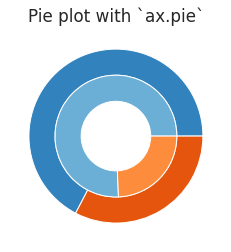

In [31]:
fig, ax = plt.subplots()

size = 0.3
# vals = np.array([[yTest_count[1], yTest_count[0]], [bayesPred_yes, bayesPred_no]])

# yTest_pie = yTest_count.array()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 5]))

ax.pie(yTest_pie, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie([rfPred_no, rfPred_yes], radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix
rfCM = confusion_matrix(yTest, rfPred)

rfCM

array([[175,  27],
       [ 52,  46]])

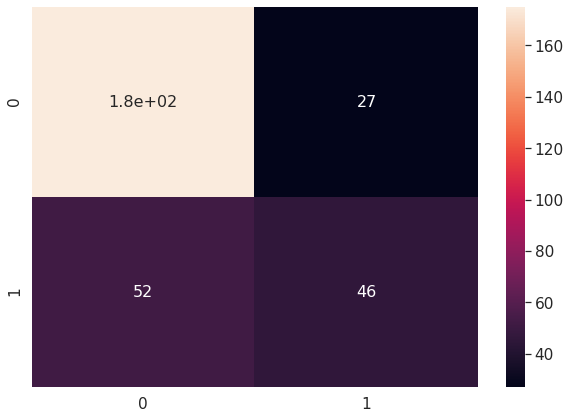

In [33]:
import seaborn as sn

rf_cm = pd.DataFrame(rfCM, range(2), range(2))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(rf_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [34]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yTest, rfPred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yTest, rfPred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yTest, rfPred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yTest, rfPred)
print('F1 score: %f' % f1)

Accuracy: 0.736667
Precision: 0.630137
Recall: 0.469388
F1 score: 0.538012


**Logistic Regression**

In [0]:
LogReg = LogisticRegression(max_iter=1000)
lgModel = LogReg.fit(xTrain, yTrain)

In [0]:
lgPred = lgModel.predict(xTest)

In [37]:
lgPred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [38]:
lgPred_no = (lgPred == 0).sum()
lgPred_yes = (lgPred == 1).sum()

print(lgPred_no)
print(lgPred_yes)

215
85


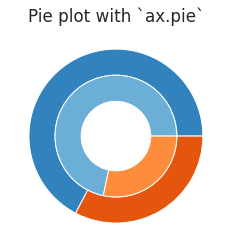

In [39]:
fig, ax = plt.subplots()

size = 0.3
# vals = np.array([[yTest_count[1], yTest_count[0]], [bayesPred_yes, bayesPred_no]])

# yTest_pie = yTest_count.array()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 5]))

ax.pie(yTest_pie, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie([lgPred_no, lgPred_yes], radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix
lgCM = confusion_matrix(yTest, lgPred)

lgCM

array([[175,  27],
       [ 40,  58]])

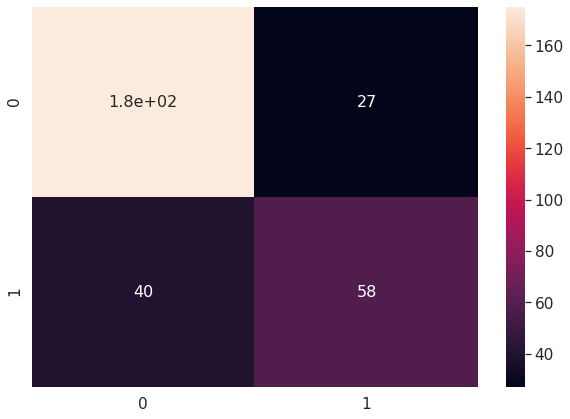

In [41]:
import seaborn as sn

lg_cm = pd.DataFrame(lgCM, range(2), range(2))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(lg_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [42]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yTest, lgPred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yTest, lgPred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yTest, lgPred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yTest, lgPred)
print('F1 score: %f' % f1)

Accuracy: 0.776667
Precision: 0.682353
Recall: 0.591837
F1 score: 0.633880


**Multilayer Perceptron**

In [0]:
mlp = MLPClassifier()
mlpModel = mlp.fit(xTrain, yTrain)

In [0]:
mlpPred = mlpModel.predict(xTest)

In [45]:
mlpPred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [46]:
mlpPred_no = (mlpPred == 0).sum()
mlpPred_yes = (mlpPred == 1).sum()

print(mlpPred_no)
print(mlpPred_yes)

221
79


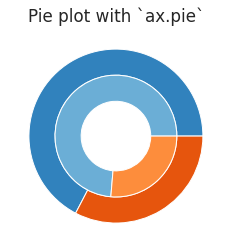

In [47]:
fig, ax = plt.subplots()

size = 0.3
# vals = np.array([[yTest_count[1], yTest_count[0]], [bayesPred_yes, bayesPred_no]])

# yTest_pie = yTest_count.array()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 5]))

ax.pie(yTest_pie, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie([mlpPred_no, mlpPred_yes], radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [48]:
from sklearn.metrics import confusion_matrix
mlpCM = confusion_matrix(yTest, mlpPred)

mlpCM

array([[181,  21],
       [ 40,  58]])

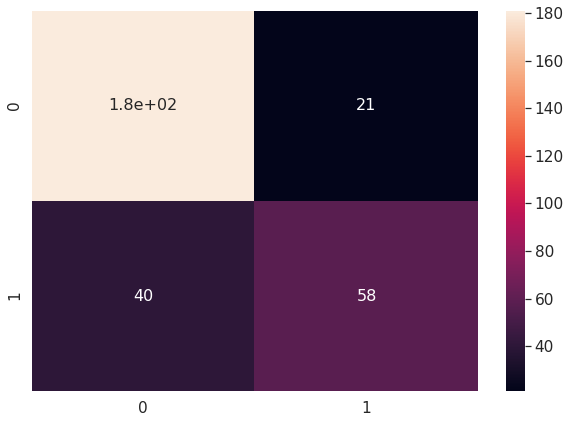

In [49]:
import seaborn as sn

mlp_cm = pd.DataFrame(mlpCM, range(2), range(2))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(mlp_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [50]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yTest, mlpPred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yTest, mlpPred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yTest, mlpPred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yTest, mlpPred)
print('F1 score: %f' % f1)

Accuracy: 0.796667
Precision: 0.734177
Recall: 0.591837
F1 score: 0.655367
